## TECHIN 513 HW1 – Modifying Signals

Author names go here 

(This should be a markup cell, which means that when you run it you just get formated text.)

In [26]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included 
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week hw.  You should plan on completing the first 2 assignments in the first week.

## HW 1 turn in checklist

•	your Jupyter or Colab notbooks (uploaded as .pdf with your outputs).

Note: You can work together but you need to submit your own work. do not copy paste from each other


## Assignment 1 -- Working with sound files

In [27]:
# Assignment 1 - Time Scaling Function

# Part A
# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

#file: the .wav file

def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly([float(i) for i in x], d, n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

fs1, x1 = wav.read("train32.wav")
print('Train whistle has : sampling rate', fs1,', Shape of x1', x1.shape)


Train whistle has : sampling rate 48000 , Shape of x1 (50313,)


In [28]:
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

# Part B
# TODO: Code that solves B
# print("Original data range:", np.min(x1), np.max(x1))
file1 = "train32.wav"
# Define new sampling rates
fs2 = int(fs1 / 2)  # 16 kHz
fs3 = int(1.5 * fs1)

# Resample the original signal 'x1' to create two new versions with different sampling rates
scaled_signal_fs2, _ = timescale(x1, fs2, 0.5)  
scaled_signal_fs3, _ = timescale(x1, fs3, 1.5)  

# Save the resampled signals to new WAV files
wav.write("output_fs2.wav", fs1, scaled_signal_fs2.astype(np.int16))
wav.write("output_fs3.wav", fs1, scaled_signal_fs3.astype(np.int16))

file2 = "output_fs2.wav"
file3 = "output_fs3.wav"
print("WAV files with different sampling rates created successfully.")

# Part C
# TODO: Code that solves C
A = sa.WaveObject.from_wave_file(file1)
play_obj = A.play()
play_obj.wait_done()

B = sa.WaveObject.from_wave_file(file2)
play_obj = B.play()
play_obj.wait_done()

C = sa.WaveObject.from_wave_file(file3)
play_obj = C.play()
play_obj.wait_done()



# Part D
# TODO: Code that solves D

WAV files with different sampling rates created successfully.


###  Discussion

Comment on how the audio changes when the incorrect sampling frequency is used.

When the incorrect sampling frequency is applied, the audio experiences distortions. This happens because the sampling frequency determines how often the audio signal is captured per second. If the frequency is incorrect, it causes the audio to play at the wrong speed, resulting in changes to the pitch. For instance, a lower frequency may make the audio sound deeper and slower, while a higher frequency can make it sound sharper and faster. In essence, using the correct sampling frequency is crucial for maintaining the original quality of the audio, and deviations can lead to noticeable alterations in the way the sound is perceived.

## Assignment 2 -- Amplitude Operations on Signals

In [29]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
# TODO: Code that solves A
# Start with a comment section that explains what the input variables are
# x1 =  discrete time signal
# s1 =  discrete time signal that has same length as x1 and has value 1 for t=[0,0.5] and value 0.2 for t>0.5
# v1 =  Multiply x1 with s1
# len1 = length of x1 
# n0 = the index corresponding to t=0.5
# Define the length of x1 and the index corresponding to t=0.5

len1 = len(x1)
n0 = int(len1 * 0.5)

# Create the discrete time signal s1
s1 = np.concatenate((np.ones(n0), 0.2 * np.ones(len1 - n0)))

# Multiply x1 with s1 to create v1
v1 = x1 * s1

# Save v1 to a WAV file
wav.write("output_v1.wav", fs1, v1.astype(np.int16))
file4 = "output_v1.wav"
# D = sa.WaveObject.from_wave_file(file4)
# play_obj = D.play()

In [30]:
# Assignment 2 - Title of Assignment 2

# Part B
# TODO: Code that solves B
# r1 = discrete-time decaying ramp signal that is the same length as x1.

step = -1/len1

# Create the discrete time signal r1
r1 = np.arange(1,0,step,dtype=float)
print(len(r1))

# Multiply x1 with r1 to create v2
v2 = r1 * x1

# Save v2 to a WAV file
wav.write("output_v2.wav", fs1, v2.astype(np.int16))
file5 = "output_v2.wav"
# E = sa.WaveObject.from_wave_file(file5)
# play_obj = D.play()

# Part C
# TODO: Code that solves C
print("Playing Original:")
A = sa.WaveObject.from_wave_file(file1)
play_obj = A.play()
play_obj.wait_done() 

print("Playing v1")
D = sa.WaveObject.from_wave_file(file4)
play_obj = D.play()
play_obj.wait_done() 

print("Playing v2")
E = sa.WaveObject.from_wave_file(file5)
play_obj = E.play()
play_obj.wait_done() 


50313
Playing Original:
Playing v1
Playing v2


###  Discussion

Discuss the differences that the two modifications have on the signal. What would happen if you defined s1 to take value 2 for the [0,0.5] range?

f s1 Takes Value 2 for the [0, 0.5] Range:
If you define s1 to take the value 2 for the [0, 0.5] range, it means that for the first half of the signal, the amplitude is doubled. This modification would lead to a signal (v1) that has a higher amplitude in the initial portion compared to the original signal (x1).

 If you wanted a smooth but faster decay in amplitude, what signal might you use?  
 I think it is the triangle signal I would use.

## Assignment 3 -- Time Scaling Audio Signals 

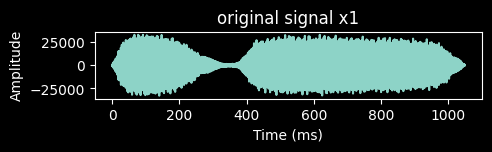

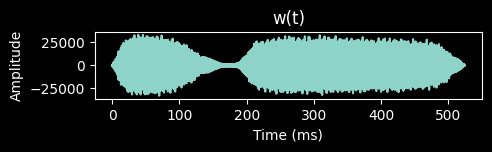

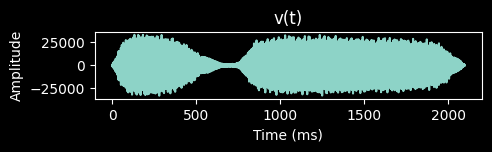

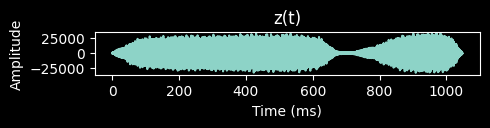

Playing original x1:
Playing w.wav:
Playing v.wav:
z.wav


In [31]:
# Assignment 3 -- Title of assignment 3

# Part A
# TODO: Code that solves A

# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

#file: the .wav file

def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly([float(i) for i in x], d, n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

y1,t1 = timescale(x1,fs1,1)

# Part B
# TODO: Code that solves B
#a
w, t_w = timescale(x1, fs1, 2)

#b
v,t_v = timescale(x1, fs1, 0.5)

#c
z = x1[::-1]

# Fixing C-contiguous error for z(t)
t_z = t1

#d
wav.write("w.wav", fs1, w.astype('int16'))

# Save v(t) to a WAV file
wav.write("v.wav", fs1, v.astype('int16'))

# Save z(t) to a WAV file
wav.write("z.wav", fs1, z.astype('int16'))


# Part C
# TODO: Code that solves C
# Plot x1
plt.figure(figsize=(5, 4))
plt.subplot(4, 1, 1)
plt.plot(t1 * 1000, x1)
plt.title('original signal x1')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.figure(figsize=(5, 4))
plt.subplot(4, 1, 1)
plt.plot(t_w * 1000, w)
plt.title('w(t)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.figure(figsize=(5, 4))
plt.subplot(4, 1, 1)
plt.plot(t_v * 1000, v)
plt.title('v(t)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.figure(figsize=(5, 4))
plt.subplot(4, 1, 1)
plt.plot(t_z * 1000, z)
plt.title('z(t)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Part D
# TODO: Code that solves D
print("Playing original x1:")
F = sa.WaveObject.from_wave_file('train32.wav')
play_obj = F.play()
play_obj.wait_done() 

print("Playing w.wav:")
F = sa.WaveObject.from_wave_file('w.wav')
play_obj = F.play()
play_obj.wait_done() 

print("Playing v.wav:")
G = sa.WaveObject.from_wave_file("v.wav")
play_obj = G.play()
play_obj.wait_done() 

print("z.wav")
H = sa.WaveObject.from_wave_file("z.wav")
play_obj = H.play()
play_obj.wait_done()     


###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?

I would expect to see multiple separate figures, each containing only one subplot. Each subplot would not share the same figure, and the plots would not be displayed within the same set of axes. This would lead to a series of individual figures instead of a single figure with multiple subplots.

## Assignment 4 -- Time Shift Operations

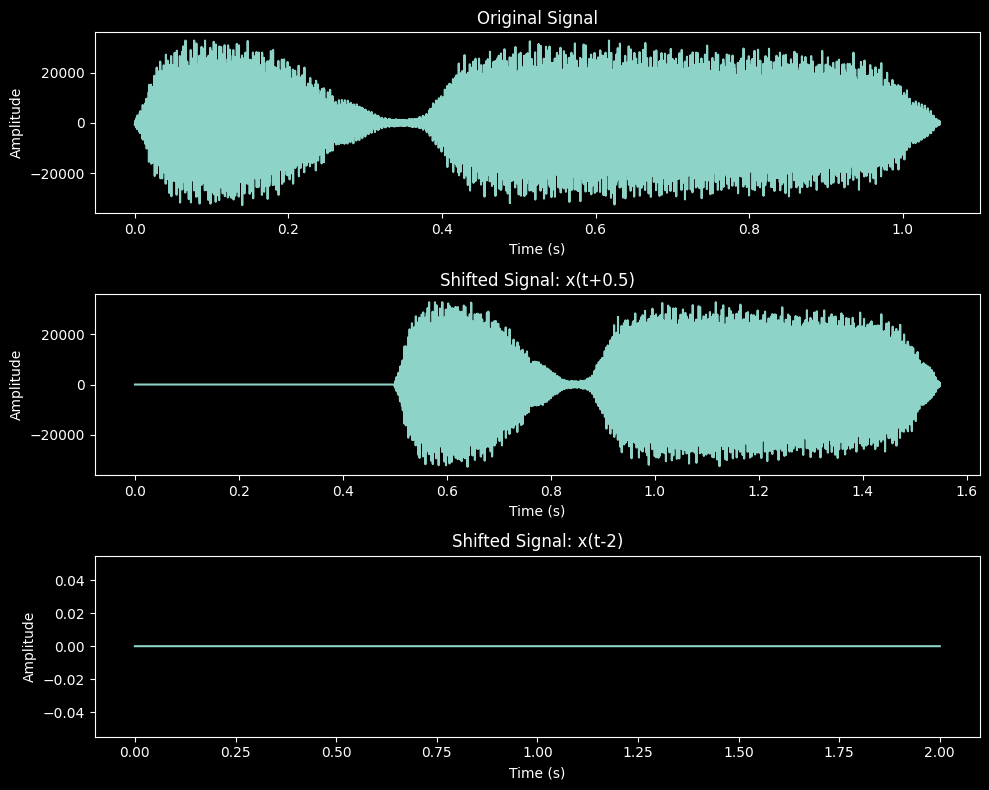

Playing Original Signal:
Playing x(t+0.5):
Playing x(t-2).wav:


In [32]:
# Part A
# TODO: Code that solves A
def timeshift(x, fs, t0):
    # Calculate the integer shift n0 based on the time shift t0 and sampling frequency fs
    n0 = int(np.round(t0 * fs))
        # A.2 Use conditional control that tests whether the time shift is positive or negative
    if n0 >= 0:
        # A.2.1 For a time delay, create y by concatenating a zero vector with the original signal.
        y = np.concatenate((np.zeros(n0), x))
    else:
        # A.2.2 For a time advance, create y by copying the portion of the signal starting from n0
        # and then appending n0 zeroes at the end of the signal.
        y = np.concatenate((x[-n0:], np.zeros(-n0)))
    
    # A.3 Based on the length of the final signal and the sampling frequency,
    # create a time vector that corresponds to the output signal length, starting at 0.
    t = np.arange(0, len(y)) * (1.0 / fs)
    
    # A.4 Return the new signal and the time vector.
    return y, t
# Part B
# TODO: Code that solves B
y1, t1 = timeshift(x1 ,fs1, 0)
y2, t2 = timeshift(x1, fs1, 0.5)
y3, t3 = timeshift(x1, fs1,-2 )
# Plotting
plt.figure(figsize=(10, 8))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t1, y1)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Shifted signal: x1(t+0.5)
plt.subplot(3, 1, 2)
plt.plot(t2, y2)
plt.title('Shifted Signal: x(t+0.5)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Shifted signal: x1(t-2)
plt.subplot(3, 1, 3)
plt.plot(t3, y3)
plt.title('Shifted Signal: x(t-2)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Part C
# TODO: Code that solves C
#d
wav.write("train32.wav", fs1, y1.astype('int16'))

# Save v(t) to a WAV file
wav.write("x(t+0.5).wav", fs1, y2.astype('int16'))

# Save z(t) to a WAV file
wav.write("x(t-2).wav", fs1, y3.astype('int16'))

print("Playing Original Signal:")
F = sa.WaveObject.from_wave_file('train32.wav')
play_obj = F.play()
play_obj.wait_done() 

print("Playing x(t+0.5):")
F = sa.WaveObject.from_wave_file("x(t+0.5).wav")
play_obj = F.play()
play_obj.wait_done() 

print("Playing x(t-2).wav:")
G = sa.WaveObject.from_wave_file("x(t-2).wav")
play_obj = G.play()
play_obj.wait_done() 



### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.

Shift is Zero (t0 = 0): In this case, the function should return the original signal without any shift. The current implementation handles this case correctly because the calculation of n0 will be zero, and the function will concatenate the original signal with a zero vector (no shift).

Advance Bigger than Original Signal (t0 < 0 and abs(t0) > len(x) / fs): If the time advance t0 is larger than the length of the original signal divided by the sampling frequency (abs(t0) > len(x) / fs), it means the shifted signal will be mostly zeros. The current implementation handles this case correctly by appending zeros at the end of the signal. However, it's worth noting that the resulting signal will have a length equal to abs(t0) * fs, and it may not accurately represent the intended behavior if the advance is significantly larger than the original signal.

A potential improvement to handle the second case more intuitively could involve modifying the function to return only the portion of the signal that corresponds to the original signal duration after the advance. This way, the resulting signal would still have the same length as the original signal, and any excess advance beyond the signal duration would not affect the output.